# Process EWAS Files to a DataFrame

### To use this notebook:

* When you download DNA methylation data from EWAS, (https://bigd.big.ac.cn/ewas/datahub/repository) it comes down in a folder named 'ewas_datahub_download'. Within that folder will be a series of subfolders with names like 'GSE54643', 'GSE53841', ...  one for each project the data came from. In the ewas_datahud_download folder there will also be a file called 'ewas_datahub_metadata.txt'. It will contain metadata in json format for the data in the project folders.


* If you place this notebook in the ewas_data_hub_download folder and run it from there, it will open the ewas_datahub_metadata.txt file and all the projedct folders and extract the data and create a dataframe with it  named df_processed. And it will then write the dataframe to a csv file.


### Below is the search criteria I have used, under advanced search, to get methylation data.

I have downloaded the first 500 samples. The site will only let you download 500 samples at a time. The settings shown gets data with:
* age over 20 years old.
* from whole blood cells
* control people not diseased
* from a microarray platform with 450K test CpGs

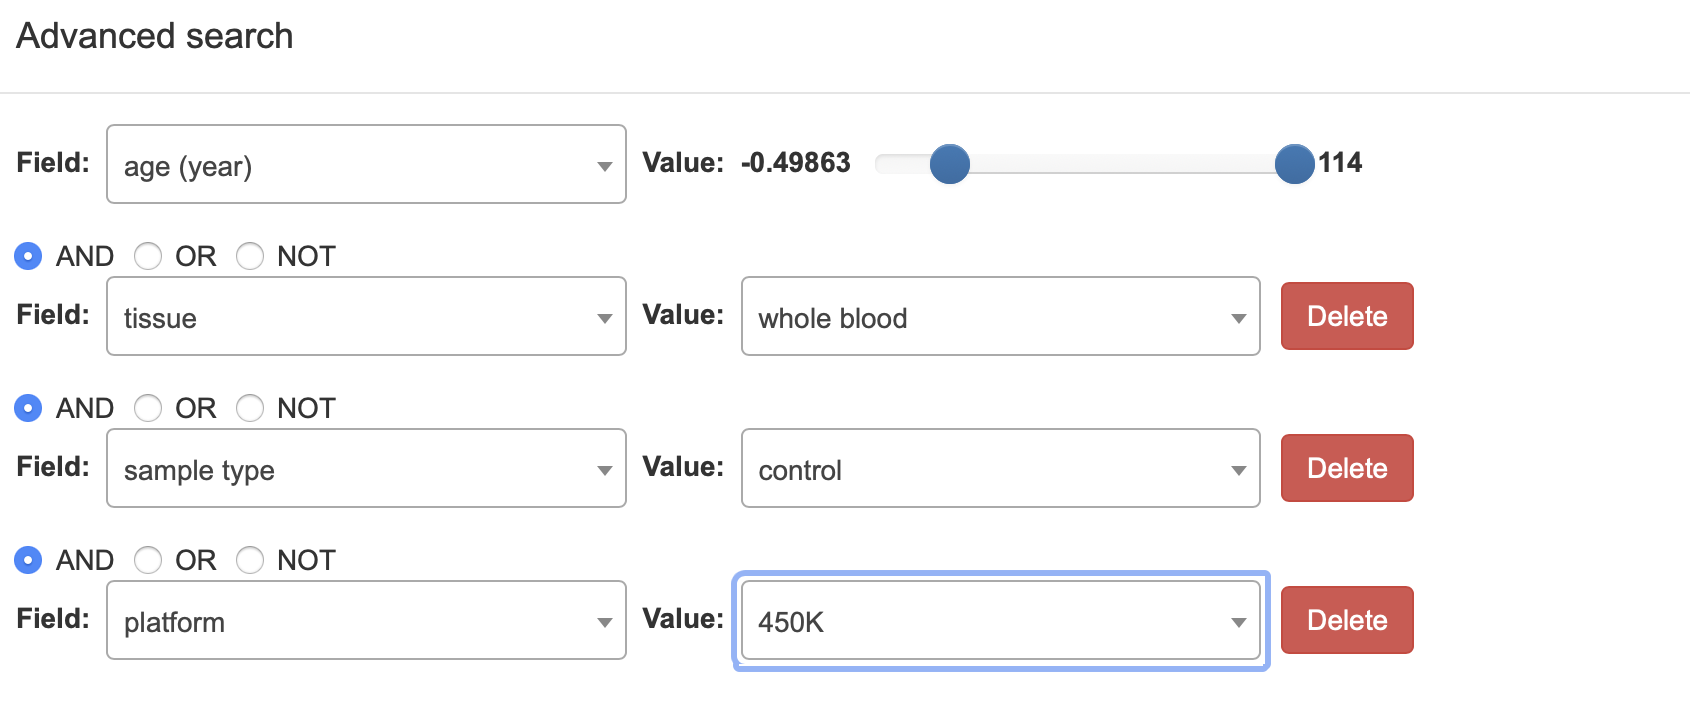

In [1]:
# Imports

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import json

In [2]:
# Functions for processing EWAS methylation data

# Open metadata file and make it into a df
def meta_data_to_df(file):
    with open(file) as f:
        meta = json.load(f)
    df_meta = pd.DataFrame(meta)
    return df_meta

# Go through meta_dataframe a row at a time and load data files into a new dataframe
# and then merge them all into 1 df
def process_EWAS_to_raw_df(df_meta):
    list_of_dfs = []
    ages = []
    sexes = []
    projects = []
    samples = []
    tissues = []
    platforms = []
    for row in df_meta.itertuples():
        project = row[1]
        sample = row[5]
        projects.append(row[1])
        ages.append(row[2])
        sexes.append(row[4])
        samples.append(row[5])
        tissues.append(row[6])
        platforms.append(row[8]) 
        df = pd.read_csv(str(project) + '/' + str(sample) + '.txt', sep = '\t', header=None)
        df.columns = ['cpg', 'sample_'+ sample]
        df.set_index('cpg', drop=True, inplace=True)
        list_of_dfs.append(df)
    df_all = list_of_dfs[0].join(list_of_dfs[1:])
    df_raw = df_all.dropna()
    #df_raw = df_all
    return df_raw, projects, ages, sexes, samples, tissues, platforms

# Transpose a raw EWAS dataframe and add metadata columns
def transpose_raw_df_and_add_metadata(df, projects, ages, sexes, samples, tissues, platforms):
    df = df.transpose()
    df.insert(0, "project", projects)
    df.insert(0, "platform", platforms)
    df.insert(0, "tissue", tissues)
    df.insert(0, "sex", sexes)
    df.insert(0, "age", ages)
    df_inverted = df.rename_axis(' ', axis=1)
    return df_inverted

# Combine a list of raw EWAS dataframes put out by process_EWAS_to_raw_df into 1 dataframe
def combine_EWAS_raw_dfs(list_of_raw_dfs):
    df_all = list_of_raw_dfs[0].join(list_of_dfs[1:])
    return df_all

In [3]:
%%time
#Processing a folder of EWAS methylation files to a single dataframe
# This cell takes 3.5 minutes with 500 samples.
file = 'ewas_datahub_metadata.txt'
df_meta = meta_data_to_df(file)
df_raw, projects, ages, sexes, samples, tissues, platforms = process_EWAS_to_raw_df(df_meta)
df_processed = transpose_raw_df_and_add_metadata(df_raw, projects, ages, sexes, samples, tissues, platforms)

CPU times: user 2min 49s, sys: 34.9 s, total: 3min 23s
Wall time: 3min 30s


In [5]:
df_processed

,age,sex,tissue,platform,project,cg02494853,cg03706273,cg05213048,cg15295597,cg27539833,...,cg27665648,ch.22.17803970R,ch.22.107403R,ch.22.22597277R,ch.22.427671F,ch.22.467397R,ch.22.33863861F,ch.22.38010425R,ch.22.43177094F,ch.22.46830341F
sample_GSM1069224,84.0,F,whole blood,450K,GSE43414,0.014,0.011,0.718,0.016,0.854,...,0.898,0.135,0.001,0.001,0.002,0.001,0.009,0.005,0.000,0.002
sample_GSM1069230,82.0,F,whole blood,450K,GSE43414,0.021,0.098,0.851,0.041,0.912,...,0.893,0.146,0.001,0.001,0.002,0.001,0.016,0.003,0.000,0.003
sample_GSM1069231,80.0,F,whole blood,450K,GSE43414,0.031,0.078,0.608,0.034,0.928,...,0.911,0.097,0.002,0.002,0.002,0.002,0.015,0.004,0.000,0.003
sample_GSM1069233,88.0,M,whole blood,450K,GSE43414,0.032,0.057,0.829,0.043,0.934,...,0.888,0.122,0.002,0.001,0.002,0.002,0.014,0.004,0.000,0.003
sample_GSM1069234,74.0,F,whole blood,450K,GSE43414,0.013,0.047,0.576,0.023,0.931,...,0.927,0.117,0.001,0.001,0.002,0.001,0.019,0.004,0.000,0.005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_GSM1302014,31.0,M,whole blood,450K,GSE53841,0.024,0.020,0.698,0.021,0.964,...,0.845,0.131,0.002,0.005,0.009,0.002,0.028,0.010,0.006,0.005
sample_GSM1320504,57.0,M,whole blood,450K,GSE54643,0.031,0.025,0.788,0.025,0.947,...,0.868,0.132,0.002,0.001,0.004,0.002,0.030,0.006,0.000,0.003
sample_GSM1320505,57.0,M,whole blood,450K,GSE54643,0.036,0.034,0.785,0.037,0.932,...,0.881,0.127,0.002,0.003,0.005,0.002,0.028,0.009,0.000,0.004
sample_GSM1320506,48.0,M,whole blood,450K,GSE54643,0.025,0.031,0.699,0.033,0.932,...,0.914,0.147,0.002,0.003,0.005,0.002,0.031,0.008,0.001,0.003


[]

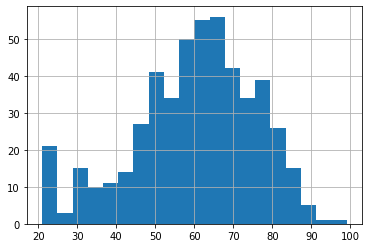

In [6]:
df_processed.age.hist(bins=20)
plt.plot()

In [7]:
df_processed.to_csv('df_processed.csv')